# DS 3000 - Assignment [TODO: enter assignment number]

**Student Name**: [TODO: Enter your name here]

**Date**: [TODO: Enter the date]


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

DS Problem:

The objective of this project to develop a machine learning model that will accurately predict a person's diabetic status (diabetic, pre-diabetic, or non-diabetic) based on various health features collected by the CDC's Behavioral Risk Factor Surveillance System. Essentially, we will find patterns in the data that will assist in early idenification of at risk indiviuals to help inform public health interventios aimed at preventing or delayignt he onset of diabetes. 


## Question 2: 
**Prepare the Data**

Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types for ML modeling. This means that you need to identify categorical data, discrete and continuous variables represent them accordingly.
Analyze the data to determine what preprocessing steps are needed to ensure that the following are handled: 1) missing values, 2) invalid values, 3) outliers. Perform the required data preparation steps and justify the approach that is taken to prepare the data for analysis. 

In [22]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
url = 'diabetes_012_health_indicators_BRFSS2015.csv'
df = pd.read_csv(url)

**Checking For Missing Values**

In [2]:
df.isnull().mean()*100

Diabetes_012            0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

It is noted there are "no" missing values but there could be invalid ones

In [3]:
valid_ranges = {'HighBP': [0,1],
    'HighChol': [0,1],
    'CholCheck': [0,1],
    
    'Smoker': [0,1],
    'Stroke': [0,1],
    'HeartDiseaseorAttack': [0,1],
    'PhysActivity': [0,1],
    'Fruits': [0,1],
    'Veggies': [0,1],
    'HvyAlcoholConsump': [0,1],
    'AnyHealthcare': [0,1],
    'NoDocbcCost': [0,1],
    'DiffWalk': [0,1],
    'Sex': [0,1],

    #Ordinal stuff
    'GenHlth': [1,5],
    'Age': [1,13],
    'Education': [1,6],
    'Income':[1,8],
    #Contiious
    'BMI': [10,70], #Adult ranges
    'MentHlth':[0,30],
    'PhysHlth':[0,30]
}
                  

In [4]:
def check_invalid(df, col, valid_range):
    min_val, max_val = valid_range
    invalid_mask = (df[col] < min_val) | (df[col] > max_val)
    invalid_rows = df[invalid_mask]
    
    print(f"\nChecking column: {col}")
    print(f"  Invalid values outside range {valid_range}: {len(invalid_rows)}")

# Run checks on all columns
for col, rng in valid_ranges.items():
    check_invalid(df, col, rng)


Checking column: HighBP
  Invalid values outside range [0, 1]: 0

Checking column: HighChol
  Invalid values outside range [0, 1]: 0

Checking column: CholCheck
  Invalid values outside range [0, 1]: 0

Checking column: Smoker
  Invalid values outside range [0, 1]: 0

Checking column: Stroke
  Invalid values outside range [0, 1]: 0

Checking column: HeartDiseaseorAttack
  Invalid values outside range [0, 1]: 0

Checking column: PhysActivity
  Invalid values outside range [0, 1]: 0

Checking column: Fruits
  Invalid values outside range [0, 1]: 0

Checking column: Veggies
  Invalid values outside range [0, 1]: 0

Checking column: HvyAlcoholConsump
  Invalid values outside range [0, 1]: 0

Checking column: AnyHealthcare
  Invalid values outside range [0, 1]: 0

Checking column: NoDocbcCost
  Invalid values outside range [0, 1]: 0

Checking column: DiffWalk
  Invalid values outside range [0, 1]: 0

Checking column: Sex
  Invalid values outside range [0, 1]: 0

Checking column: GenHlth
  

BMIs outside the range of 10 to 70 are considered biologically implausible and are likely data entry errors. These entries were excluded from the analysis to avoid skewing the model and introducing bias

In [5]:
df = df[(df['BMI'] >= 10) & (df['BMI'] <= 70)]

**Data Type Conversions**

In [6]:
df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [7]:
binary_features = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 
                    'Smoker', 'Stroke','HeartDiseaseorAttack', 'PhysActivity',
                   'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 
                   'NoDocbcCost', 'DiffWalk', 'Sex']
binary_target = ['Diabetes_012']

ordinal_features = ['GenHlth', 'Age', 'Education' , 'Income'] #make into categorical too 
continious_features = ['BMI', 'MentHlth', 'PhysHlth'] ##Discrete numerical values


In [8]:
df[binary_target] = df[binary_target].astype('category')

for col in binary_features:
    df[col] = df[col].astype('category')

for col in ordinal_features:
    df[col] = df[col].astype('category')                                            
    

In [9]:
df.dtypes

Diabetes_012            category
HighBP                  category
HighChol                category
CholCheck               category
BMI                      float64
Smoker                  category
Stroke                  category
HeartDiseaseorAttack    category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                 category
MentHlth                 float64
PhysHlth                 float64
DiffWalk                category
Sex                     category
Age                     category
Education               category
Income                  category
dtype: object

**Checking for Outliers in the Numerical Data**

In [10]:
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < low_bound) | (df[col] > upper_bound)]
    print(f'{col}: {len(outliers)} outliers')

    return outliers, low_bound, upper_bound

for col in continious_features:
    outliers, low, high = detect_outliers(df, col)

BMI: 9263 outliers
MentHlth: 36121 outliers
PhysHlth: 40848 outliers


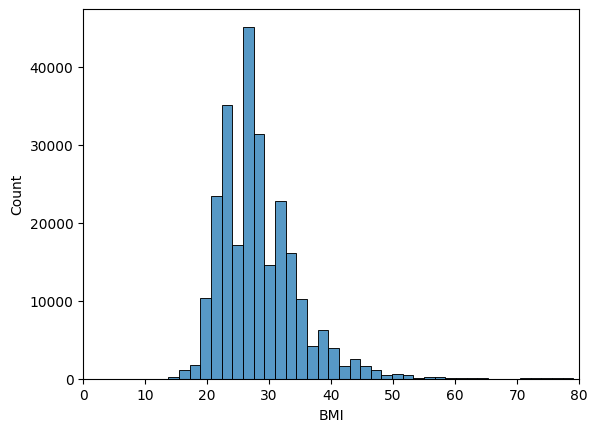

In [23]:
sns.histplot(df['BMI'], bins=50)
plt.xlim(0, 80)  # adjust if needed
plt.show()

In [24]:
df['BMI'].describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

With the Min being 12, this is very possible, max being 70 was the maximum. Most values between 24 and 31 r consistent w overweight and the obese population. I believe these extremes are needed for modeling as the range between 12-70 are possible.

<Axes: xlabel='MentHlth'>

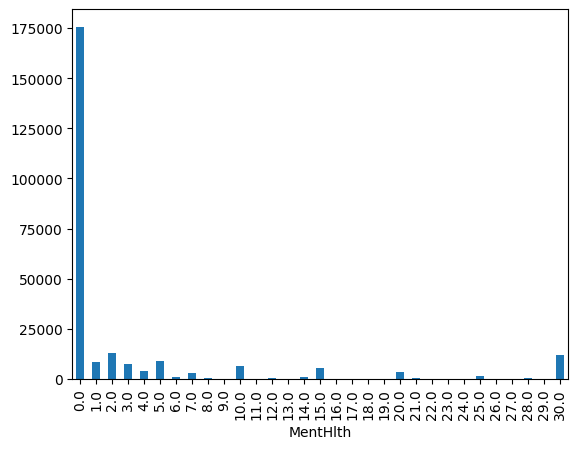

In [25]:
df['MentHlth'].value_counts().sort_index().plot(kind='bar')

Most people reported 0 days meaning no bad health days. Values at the high end are not invalid however simpliy less common.

<Axes: xlabel='PhysHlth'>

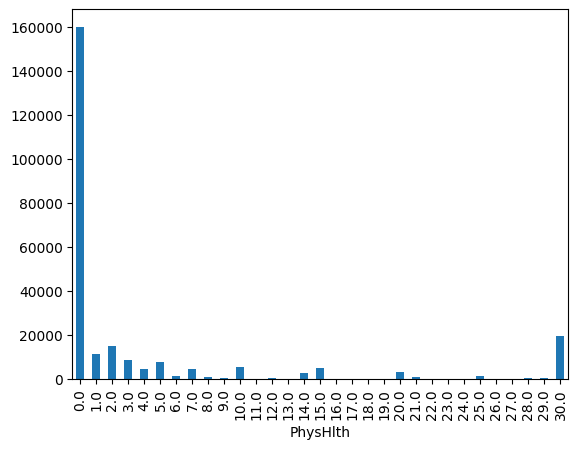

In [26]:
df['PhysHlth'].value_counts().sort_index().plot(kind='bar')

Most people reported 0 days meaning no bad health days. Values at the high end are not invalid however simpliy less common.